# Applied Data Science
## Data Exploration and Visualisation
### Tom Diethe

In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display
from scipy.io import loadmat
from tsne import bh_sne
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import Axes3D

sns.set_context("talk", font_scale=2, rc={"lines.linewidth": 4})

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Plotting functions

In [2]:
def scatter2d(X, y):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(X[:,0], X[:,1], c=y)
    palette = sns.color_palette("husl", len(np.unique(y)))

    for i in range(len(y)):
        ax.text(X[i,0], X[i,1], y[i], color=palette[y[i]-1], fontsize='xx-small')
        
def scatter3d(X, y):
    fig = plt.figure(figsize=(15,10))
    fig.add_subplot(111, projection='3d')
    ax = Axes3D(fig)

    ax.mouse_init()
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
    for i in range(len(y)):
        ax.text(X[i,0], X[i,1], X[i,2], y[i], color=palette[y[i]-1], fontsize='xx-small')

### Load MNIST data

In [3]:
mnist_train = loadmat('mnist/mnist_train.mat')
mnist_test = loadmat('mnist/mnist_train.mat')
X_train = mnist_train['train_X']
y_train = mnist_train['train_labels'].ravel()
Xs, ys = shuffle(X_train, y_train, n_samples=1000, random_state=0)

### 2D version

In [3]:
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
%time P = model.fit_transform(Xs)

CPU times: user 6.17 s, sys: 463 ms, total: 6.64 s
Wall time: 8.05 s


<IPython.core.display.Javascript object>


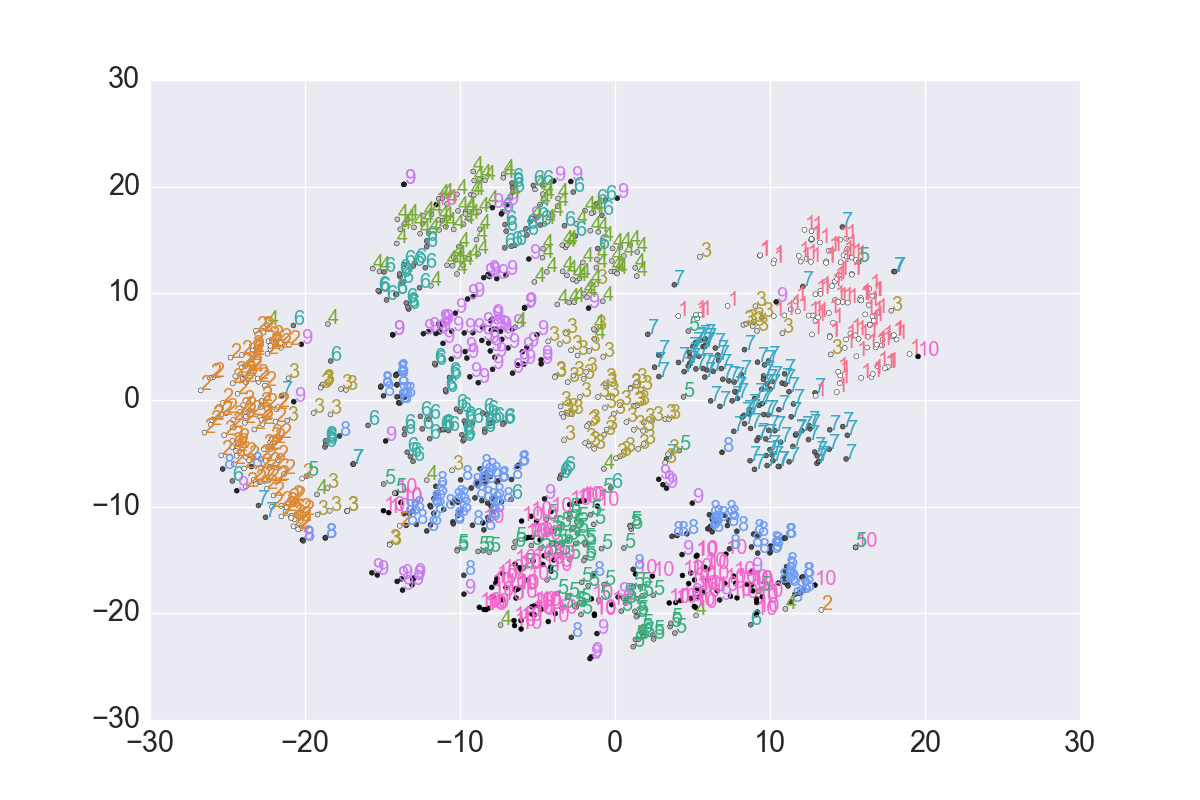

In [42]:
scatter2d(P, ys)

### Run Barnes-Hut t-SNE (see https://github.com/danielfrg/tsne)

In [5]:
%time B = bh_sne(Xs)

CPU times: user 5.43 s, sys: 71.2 ms, total: 5.5 s
Wall time: 6.68 s


<IPython.core.display.Javascript object>


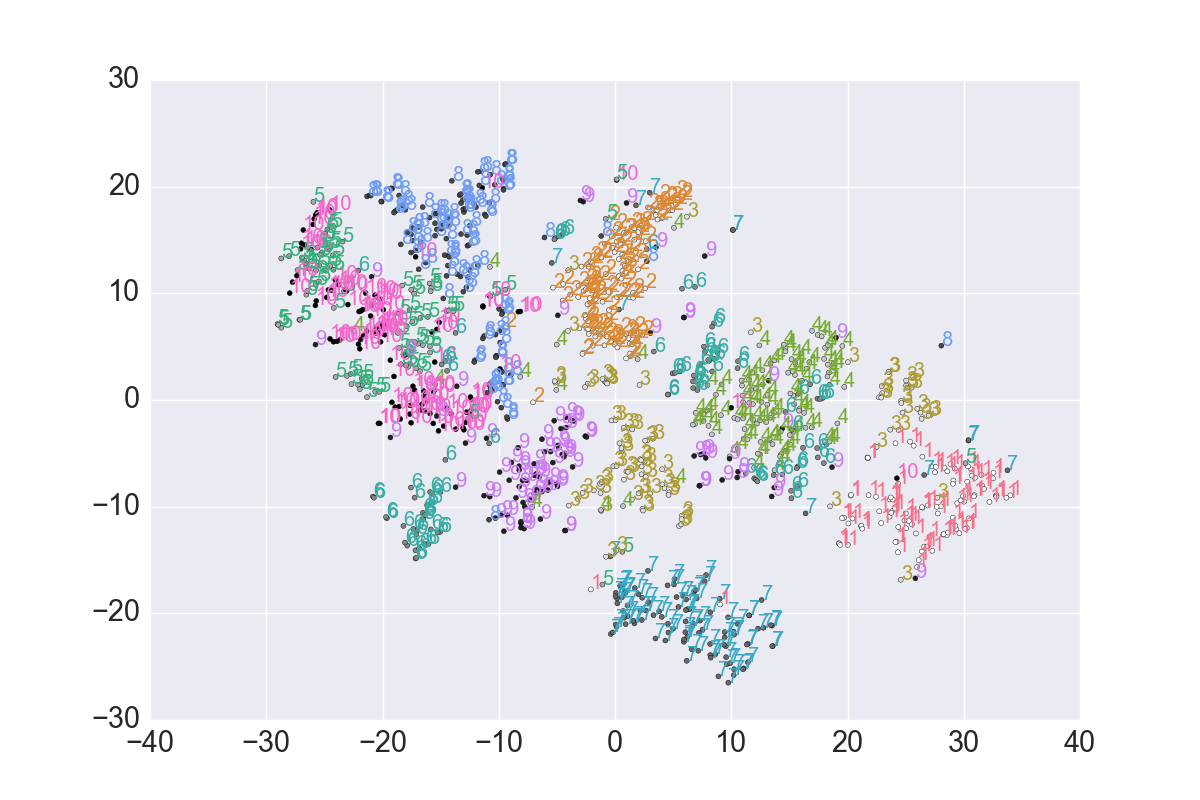

In [43]:
scatter2d(B, ys)

### 3D Version

In [7]:
model3 = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)
%time P3 = model3.fit_transform(Xs)

CPU times: user 9.15 s, sys: 576 ms, total: 9.72 s
Wall time: 12.7 s


<IPython.core.display.Javascript object>


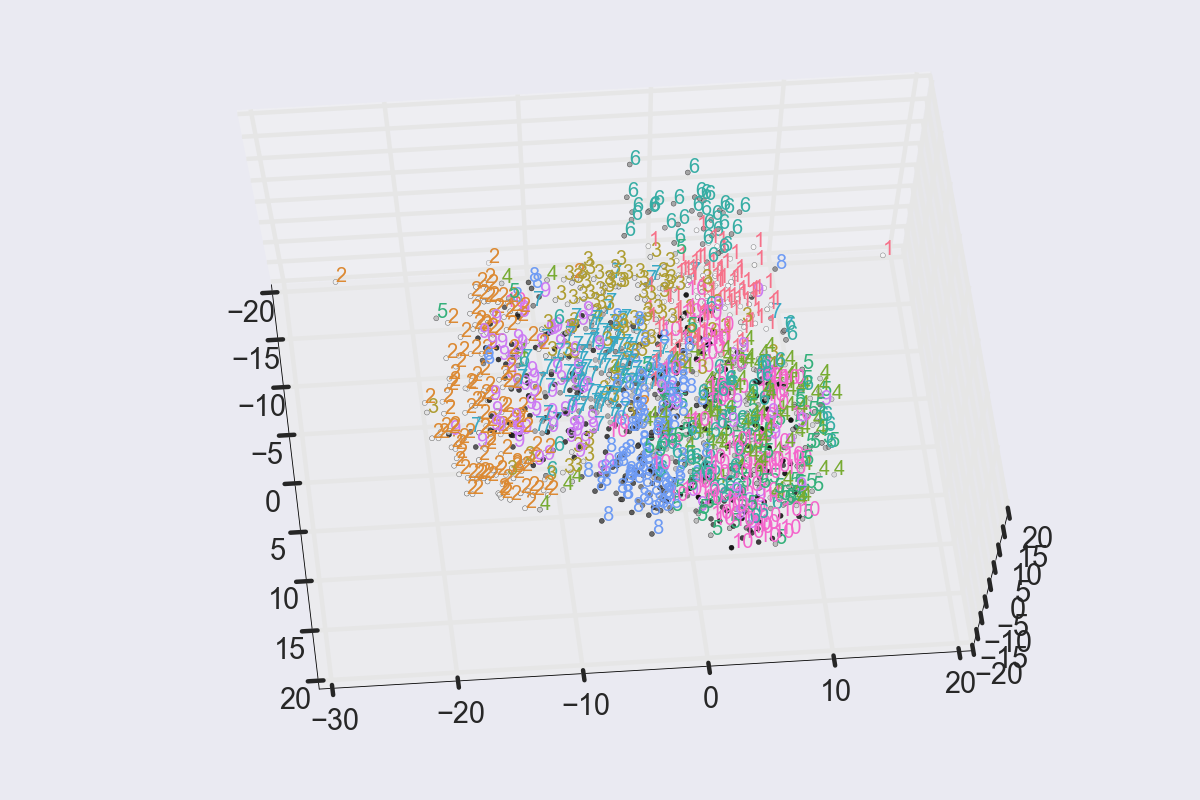

In [44]:
scatter3d(P3, ys)

### Random projections on same data

In [4]:
from sklearn import random_projection
min_dim = random_projection.johnson_lindenstrauss_min_dim(n_samples=X_train.shape[0], eps=0.9)

grp = random_projection.GaussianRandomProjection(n_components=2)
X_new = grp.fit_transform(Xs)

<IPython.core.display.Javascript object>


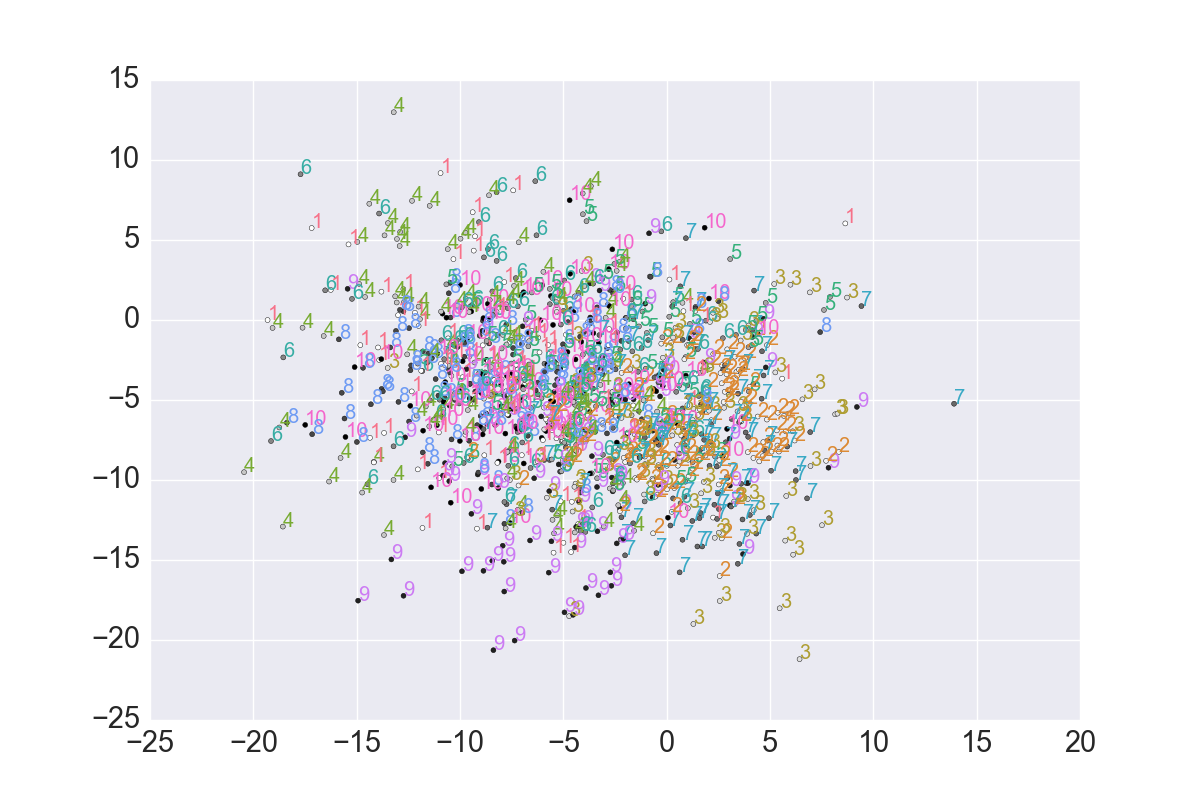

In [5]:
scatter2d(X_new, ys)

<IPython.core.display.Javascript object>


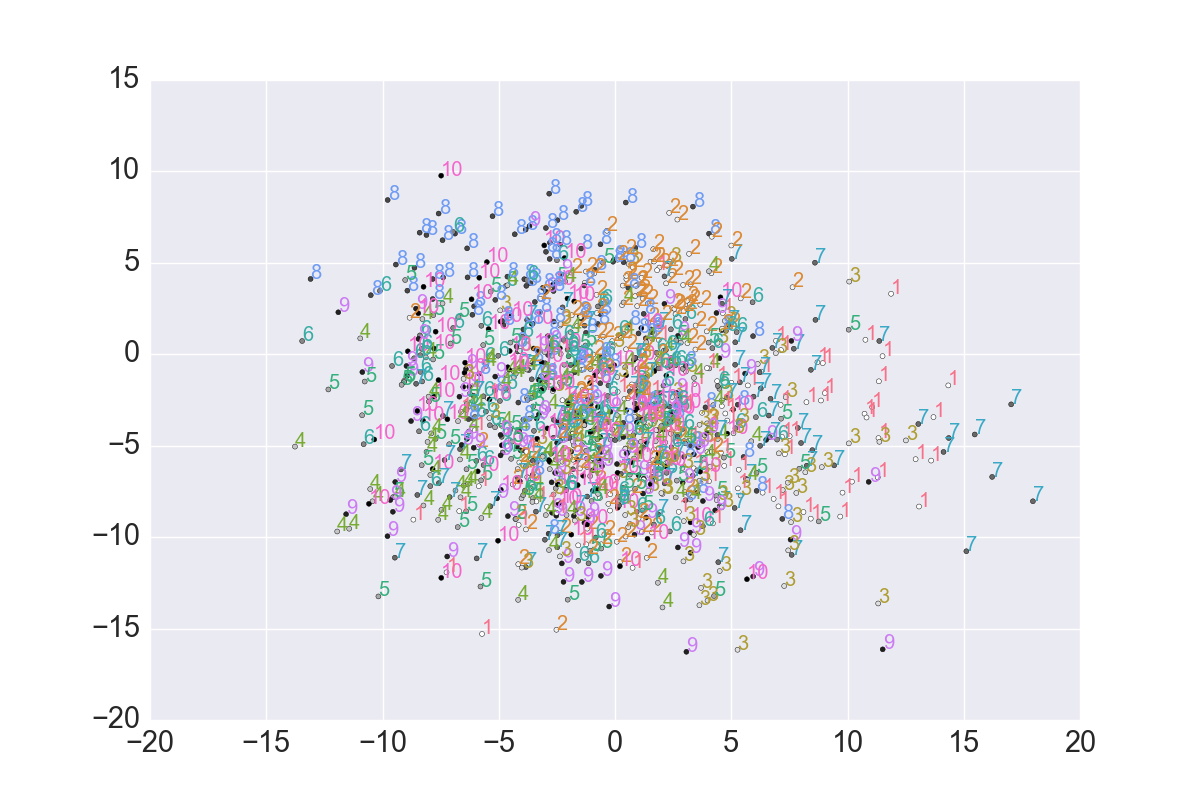

In [6]:
srp = random_projection.SparseRandomProjection(n_components=2)
X_new = grp.fit_transform(Xs)
scatter2d(X_new, ys)